### Linear regression from scratch using OLS

In [497]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import copy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [498]:
train_data=pd.read_csv('/Users/pushpakumar/Downloads/cs-215-assignment-3-multiple-variate-regression/train.csv')
# test_data=pd.read_csv('/Users/pushpakumar/Downloads/cs-215-assignment-3-multiple-variate-regression/test.csv')

0.5 and only squares 236.7

0.5 and till cubes 239.8

In [499]:
train_corr=train_data.corr()
target = 'yield'
correlation_with_target = train_corr[target]

low_corr_threshold = 0.1
low_corr_features = correlation_with_target[abs(correlation_with_target) < low_corr_threshold].index.tolist()

high_corr_threshold=0.6
high_corr_features = correlation_with_target[abs(correlation_with_target) > high_corr_threshold].index.tolist()

train_data = train_data.drop(columns=low_corr_features)
train_data['fruitset_squared'] = train_data['fruitset'] ** 2
train_data['fruitmass_squared'] = train_data['fruitmass'] ** 2
train_data['seeds_squared'] = train_data['seeds'] ** 2
# train_data['fruitset_cubed'] = train_data['fruitset'] ** 3
# train_data['fruitmass_cubed'] = train_data['fruitmass'] ** 3
# train_data['seeds_cubed'] = train_data['seeds'] ** 3
# train_data['fruitset_pow4'] = train_data['fruitset'] ** 4
# train_data['fruitmass_pow4'] = train_data['fruitmass'] ** 4
# train_data['seeds_pow4'] = train_data['seeds'] ** 4
# train_data['fruitset_pow5'] = train_data['fruitset'] ** 5
# train_data['fruitmass_pow5'] = train_data['fruitmass'] ** 5
# train_data['seeds_pow5'] = train_data['seeds'] ** 5
x= train_data.drop(columns='yield')
y = train_data['yield'].values
scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y/8000, test_size=0.1, random_state=0)

In [500]:
# train_corr=train_data.corr()
# target = 'yield'
# correlation_with_target = train_corr[target]

# low_corr_threshold = 0.2
# low_corr_features = correlation_with_target[abs(correlation_with_target) < low_corr_threshold].index.tolist()

# train_data = train_data.drop(columns=low_corr_features)

# x= train_data.drop(columns='yield')
# y = train_data['yield']

# poly = PolynomialFeatures(degree=2, include_bias=False)
# x_poly = poly.fit_transform(x)

# scaler_x = StandardScaler()
# x_poly_scaled = scaler_x.fit_transform(x_poly)
# scaler_y = StandardScaler()
# y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)) 


# x_train, x_test, y_train, y_test = train_test_split(x_poly_scaled, y_scaled, test_size=0.1, random_state=0)

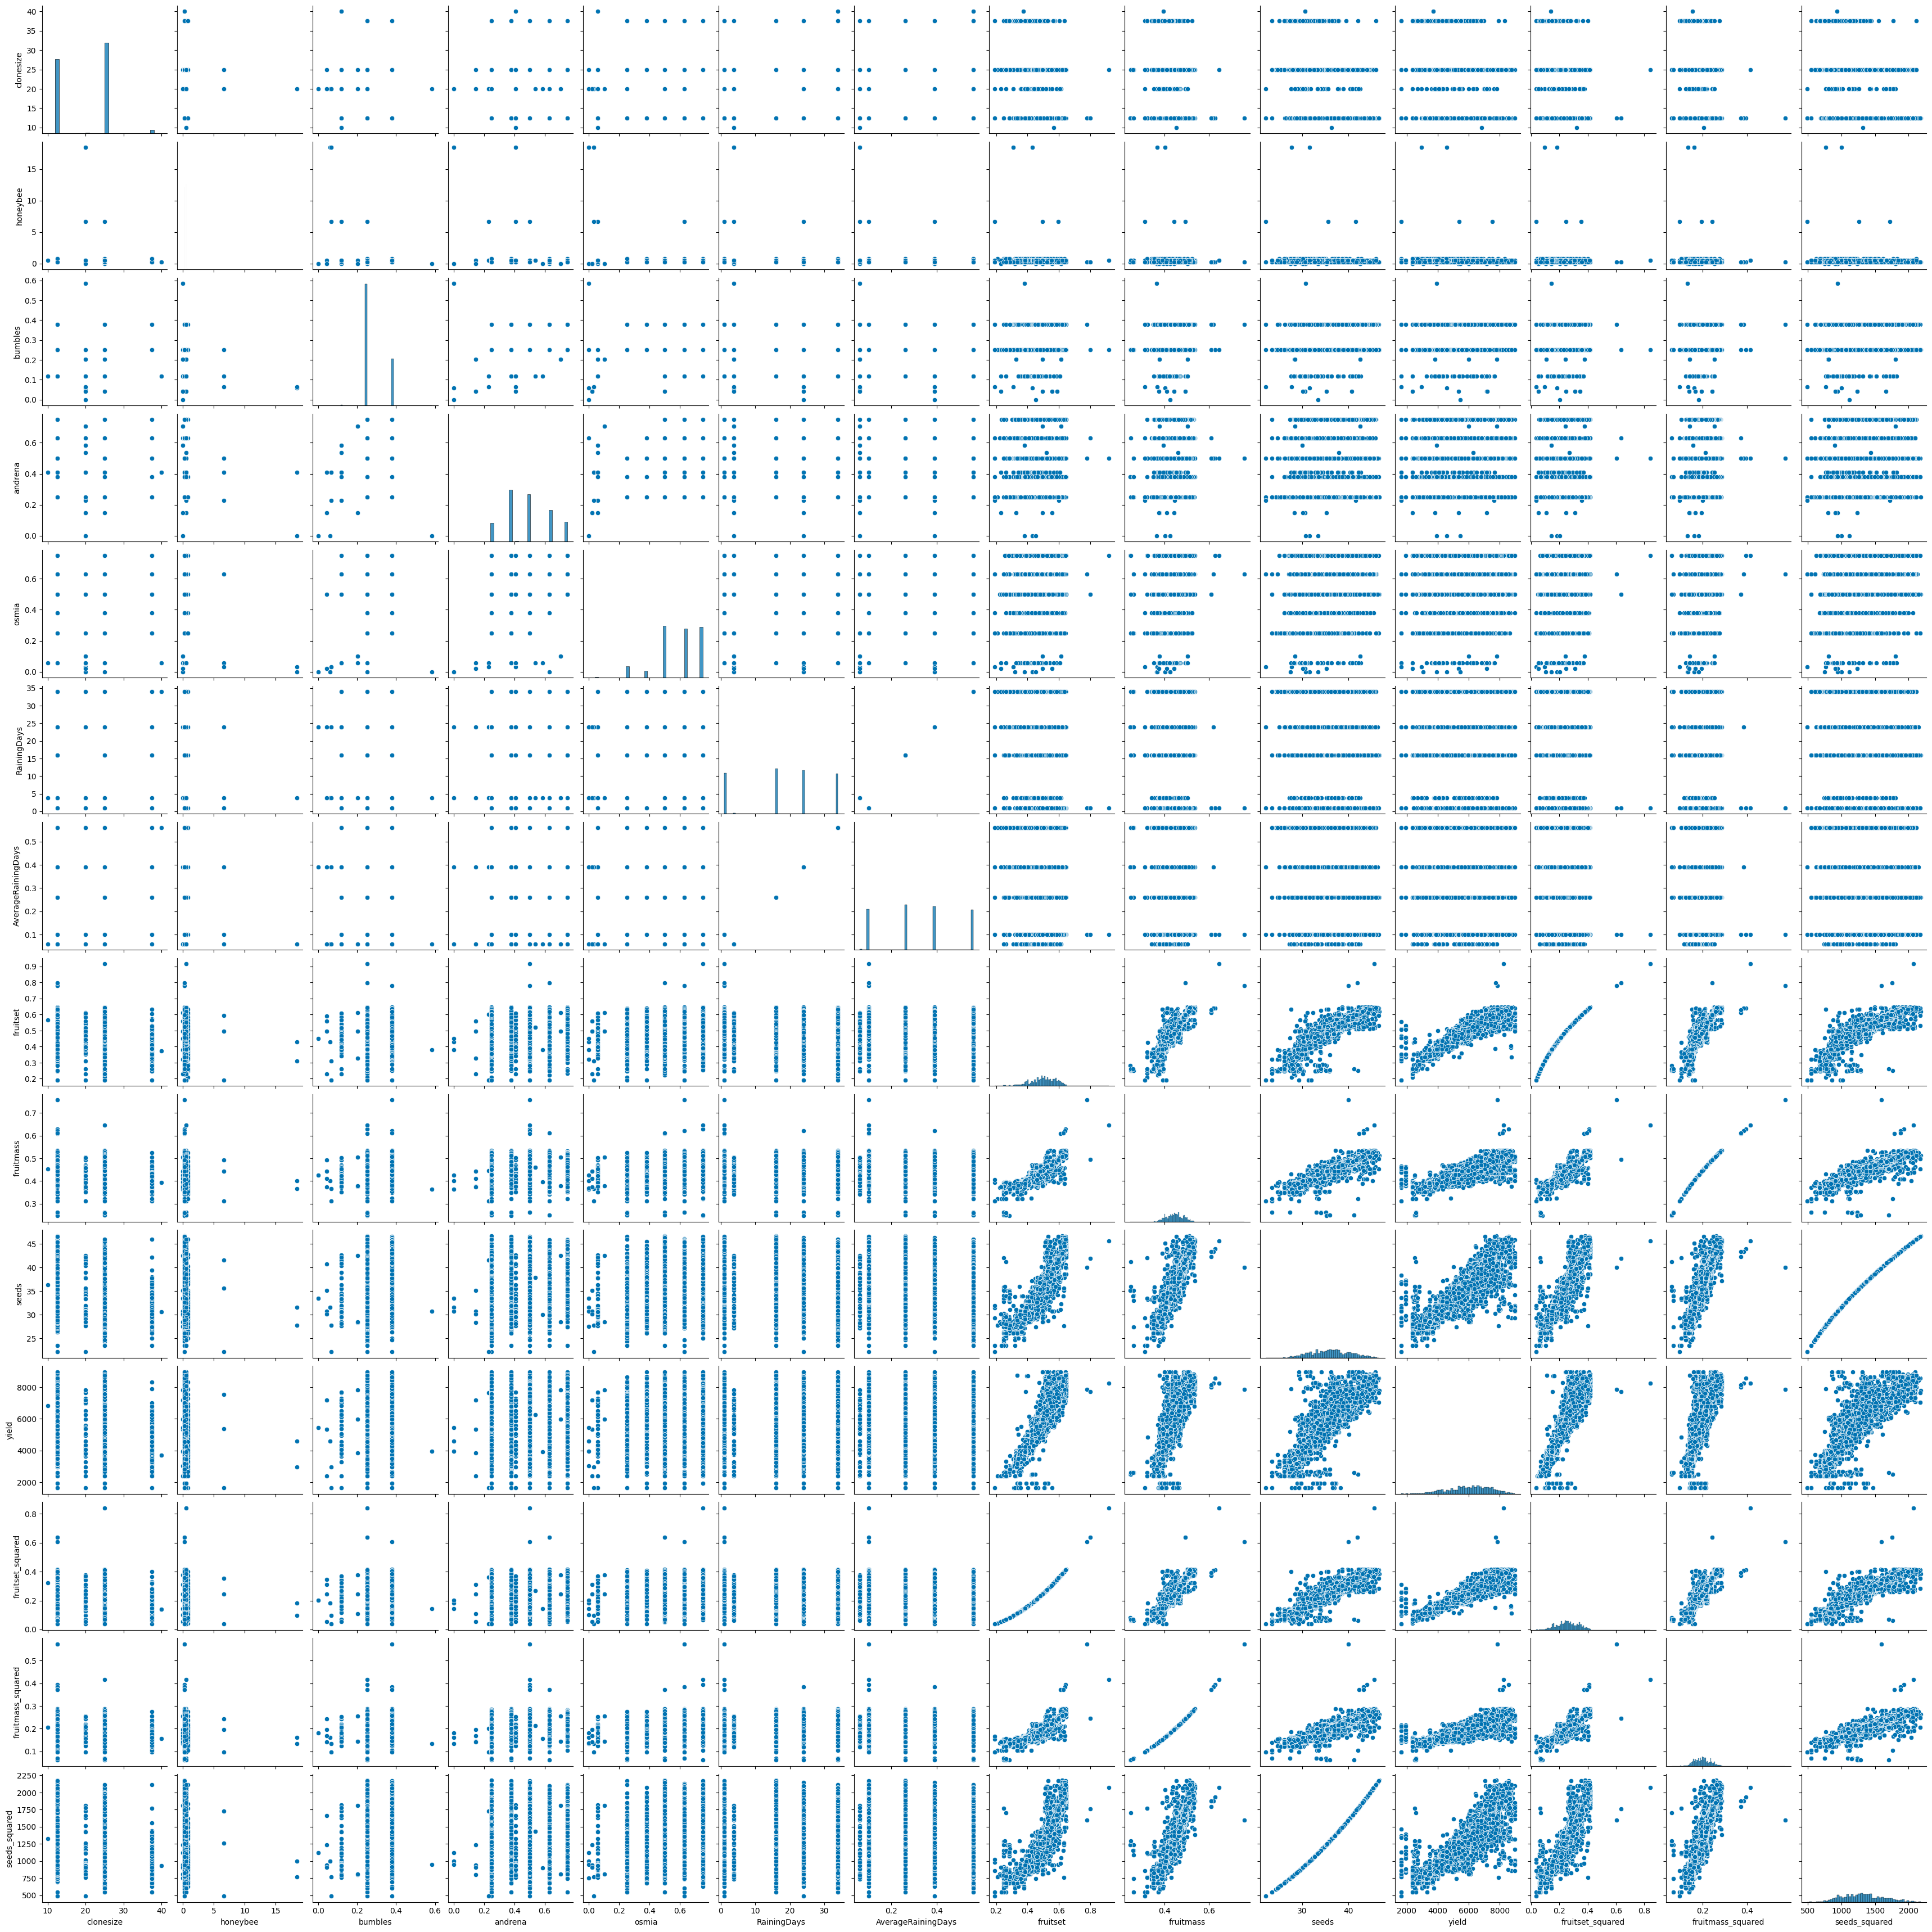

In [501]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=train_data)

In [502]:

class Multiple_linear_regression():
    def __init__(self):
        self.coefficients=None
        self.intercept=None
        
    def fit(self,x,y):
        x=self.transform_x(x)
        y=self.transform_y(y)
        betas=self.estimate_coefficients(x,y)
        self.intercept=betas[0]
        self.coefficients=betas[1:]
        
    def predict(self, x):
        ## y = b_0 + b_1*x + ... + b_i*x_i
        prediction = np.dot(x, self.coefficients) + self.intercept
        return prediction
    
    def r2_score(self, y_true, y_pred):
        '''
            r2 = 1 - (rss/tss)
            rss = sum_{i=0}^{n} (y_i - y_hat)^2
            tss = sum_{i=0}^{n} (y_i - y_bar)^2
        '''
        y_values=y_true
        y_avg=np.mean(y_values)
        
        residual_sum_of_squares=0
        total_sum_of_squares=0
        for i in range(len(y_values)):
            residual_sum_of_squares+=(y_values[i]-y_pred[i])**2
            total_sum_of_squares+=(y_values[i]-y_avg)**2
            
        return 1-(residual_sum_of_squares/total_sum_of_squares)
    
    def transform_x(self, x):
        return np.hstack((np.ones((x.shape[0], 1)), x))
    def transform_y(self,y):
        return y
    def estimate_coefficients(self,x,y):
        # (x'x)^-1 x'y 
        xT=x.transpose()
        inversed=np.linalg.inv(xT.dot(x))
        coefficients=inversed.dot(xT).dot(y) 
        return coefficients

In [503]:
class Nadaraya_watson_kernel_guassian():
    def __init__(self,bandwidth=1.0):
        self.bandwidth=bandwidth
        self.x_data=None
        self.y_data=None
    def fit(self,x,y):
        self.x_data=np.array(x)
        self.y_data=np.array(y)
    def gaussian_kernel(self,x):
        ## (1/2*pi) e^{-x^2 / 2}
        exponent=np.exp(-0.5 * (x**2))
        result=exponent/np.sqrt(2*np.pi)
        return result
    
    def predict(self, x):
        temp = (x - self.x_data) / self.bandwidth
        distance_from_origin=np.linalg.norm(temp,axis=1)
        ker = self.gaussian_kernel(distance_from_origin)
        num = np.sum(ker * self.y_data)
        den = np.sum(ker)
        return num / den           
    
    def risk_function(self, x, y):
        # x is prediction y is actual 
        return np.mean((x-y)**2)

In [504]:
def mean_absolute_error(x,y):
    n=len(x)
    error=0
    for i in range(n):
        error+=abs(x[i]-y[i])
    return error/n

In [505]:
class predict_data():
    def __init__(self,x,y,z):
        self.x_train=x
        self.y_train=y
        self.x_test=z
        
    def train(self):
        self._train_mlr()
        self._train_kr()
    
    def test(self):
        self.prediction_mlr_test=self.mlr.predict(self.x_test)
        self.prediction_kr_test=[]
        for i in range(len(self.x_test)):
            temp=self.kr.predict(self.x_test[i])
            self.prediction_kr_test.append(temp)
            
    def prediction(self):
        self.train()
        self.test()
        
        self.prediction_mlr_test=np.array(self.prediction_mlr_test)
        self.prediction_kr_test=np.array(self.prediction_kr_test)
        self.x_train_final = np.column_stack((self.prediction_mlr, self.prediction_kr))
        self.y_train_final=self.y_train
        self.x_test_final = np.column_stack((self.prediction_mlr_test, self.prediction_kr_test))
        
        self.mix_kr=Nadaraya_watson_kernel_guassian(72.72727272727273)
        self.mix_kr.fit(self.x_train_final,self.y_train_final)
        self.predict_final=[]
        for j in range(len(self.x_test_final)):
            temp=self.mix_kr.predict(self.x_test_final[j])
            self.predict_final.append(temp)
        return self.predict_final
    
    def _train_mlr(self):
        self.mlr=Multiple_linear_regression()
        self.mlr.fit(self.x_train,self.y_train)
        self.prediction_mlr=self.mlr.predict(self.x_train)
        self.MAE_mlr=mean_absolute_error(self.prediction_mlr,self.y_train)
        
    def _train_kr(self,bandwidth=0.1606425702811245):
        self.bandwidth=bandwidth
        self.kr=Nadaraya_watson_kernel_guassian(self.bandwidth)
        self.kr.fit(self.x_train,self.y_train)
        self.prediction_kr=[]
        for i in range(len(self.x_train)):
            temp=self.kr.predict(self.x_train[i])
            self.prediction_kr.append(temp)
        self.MAE_kr=mean_absolute_error(self.prediction_kr,y_train)

In [506]:
res=predict_data(x_train,y_train,x_test)

In [507]:
final=res.prediction()

In [508]:
print(final)

[0.7539206892511995, 0.7539187988529805, 0.7539227160697873, 0.7539191333508353, 0.753919476855113, 0.7539212888161287, 0.7539186828211734, 0.7539198746465335, 0.7539204201157174, 0.7539206122929638, 0.7539210081460257, 0.7539176199607963, 0.7539184912411511, 0.7539181678537199, 0.7539210784565707, 0.7539209587887015, 0.7539171654187944, 0.7539158668483895, 0.7539186541168375, 0.7539180632103962, 0.7539202045734865, 0.7539199231906828, 0.7539197849708015, 0.7539198123825352, 0.7539170501350451, 0.7539217139049345, 0.7539192080415361, 0.7539187616764246, 0.7539211653116391, 0.7539216919862468, 0.7539201521953824, 0.7539159352442152, 0.7539187657027878, 0.7539200225042191, 0.7539145351806326, 0.7539194809606196, 0.7539196180193235, 0.7539184731957076, 0.7539198081706882, 0.7539171297098918, 0.753918033624451, 0.7539179442130675, 0.7539178209661547, 0.7539219181173044, 0.7539223528230744, 0.7539207489695768, 0.7539208526182493, 0.7539220099722669, 0.7539210264629082, 0.7539168467195484, 0

In [509]:
print(mean_absolute_error(y_test,final))

0.14005602034381973


In [510]:
print(mean_absolute_error(y_test,res.prediction_mlr_test))

0.03208894378842


below 4 blocks for calculating optimal h for kr

In [511]:
x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [512]:
print(x_train_h.shape)

(12150, 13)


/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_18136/4280900310.py:16: RuntimeWarning: divide by zero encountered in divide
  temp = (x - self.x_data) / self.bandwidth
/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_18136/4280900310.py:16: RuntimeWarning: invalid value encountered in divide
  temp = (x - self.x_data) / self.bandwidth


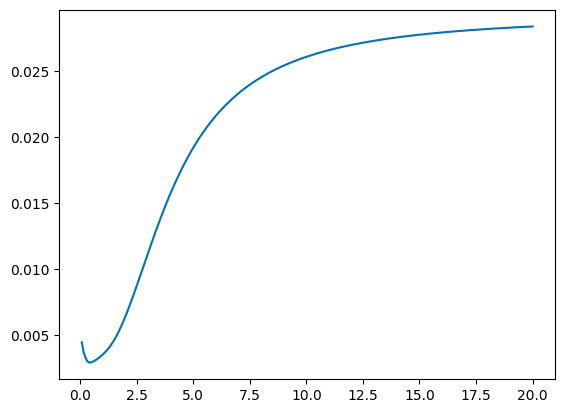

In [513]:
h_x=np.linspace(0,20,250)
risk=[]
for i in h_x:
    a=Nadaraya_watson_kernel_guassian(i)
    a.fit(x_train_h,y_train_h)
    pred=[]
    for j in range(len(x_test_h)):
        temp=a.predict(x_test_h[j])
        pred.append(temp)
    risk.append(a.risk_function(pred,y_test_h))
plt.plot(h_x,risk)

In [514]:
risk=np.array(risk)
risk_witout_nan=risk[~np.isnan(risk)]
print(risk_witout_nan.min())
index = np.where(risk== risk_witout_nan.min())[0][0]
print(index)
h=h_x[index]
print(h)

0.0029023848545563025
5
0.40160642570281124


In [515]:
kr=Nadaraya_watson_kernel_guassian(0.4819277108433735)
kr.fit(x_train,y_train)
prediction_kr=[]
for i in range(len(x_train)):
    temp=kr.predict(x_train[i])
    prediction_kr.append(temp)
    
print(prediction_kr[0:15])

print(y_train[0:15])

[0.49838912444205596, 0.9466979744605435, 0.9799112673872614, 0.7664128934915467, 0.9494582815020616, 0.5380796160178105, 0.7590823081884831, 0.8616418889818418, 0.6377022881152257, 0.3135927896222367, 0.5235009184460678, 0.8516131789414375, 0.5231217092174553, 0.5492507859083439, 0.8964810954256061]
[0.51571964 0.92793373 1.12117523 0.77828564 0.97229364 0.6191232
 0.71749062 0.84646536 0.61578488 0.31354696 0.49048829 0.87595853
 0.52824516 0.52909529 0.9269868 ]


In [516]:
print(mean_absolute_error(y_train,prediction_kr))

0.03197638081292413


below 4 blocks for finding best h for mixed data 

/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_18136/4280900310.py:16: RuntimeWarning: divide by zero encountered in divide
  temp = (x - self.x_data) / self.bandwidth
/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_18136/4280900310.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return num / den
/var/folders/hz/gjlv0lbd4ds7shs1th30424c0000gp/T/ipykernel_18136/4280900310.py:16: RuntimeWarning: invalid value encountered in divide
  temp = (x - self.x_data) / self.bandwidth


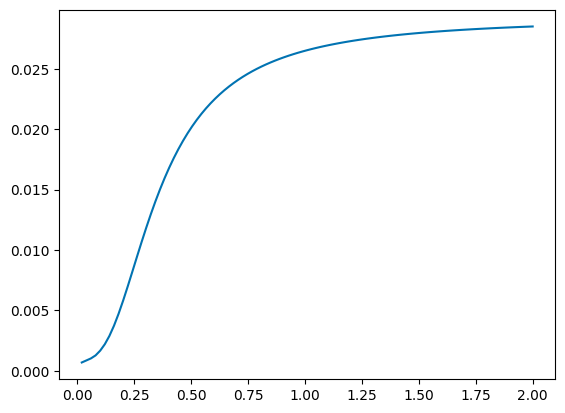

In [517]:
aa=res.prediction_mlr
bb=res.prediction_kr

x_train_final = np.column_stack((aa, bb))
y_train_final=res.y_train

cc=res.prediction_mlr_test
dd=res.prediction_kr_test

x_test_final=np.column_stack((cc, dd))
y_test_final=y_test
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_train_final, y_train_final, test_size=0.1, random_state=0)

h_x=np.linspace(0,2,100)
risk=[]
for i in h_x:
    a=Nadaraya_watson_kernel_guassian(i)
    a.fit(x_train_f,y_train_f)
    pred=[]
    for j in range(len(x_test_f)):
        temp=a.predict(x_test_f[j])
        pred.append(temp)
    risk.append(a.risk_function(pred,y_test_f))
plt.plot(h_x,risk)
    


In [518]:
risk=np.array(risk)
risk_witout_nan=risk[~np.isnan(risk)]
print(risk_witout_nan.min())
index = np.where(risk== risk_witout_nan.min())[0][0]
print(index)
h=h_x[index]
print(h)

0.0006954164155897368
1
0.020202020202020204


In [519]:
xx=Nadaraya_watson_kernel_guassian(2.0202020202020203)
xx.fit(x_train_final,y_train_final)
pred=[]
for j in range(len(x_test_final)):
    temp=xx.predict(x_test_final[j])
    pred.append(temp)

In [520]:
print(mean_absolute_error(pred,y_test_final))

0.13837127065129404
